In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
file_path = r"C:\Users\Admin\Downloads\superstore.xlsx"
data = pd.read_excel(file_path)

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,44256,44378,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,44317,44531,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Country/Region     object
City               object
State/Province     object
Postal Code        object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object

In [ ]:
#find duplicate values
data.duplicated().sum()

np.int64(0)

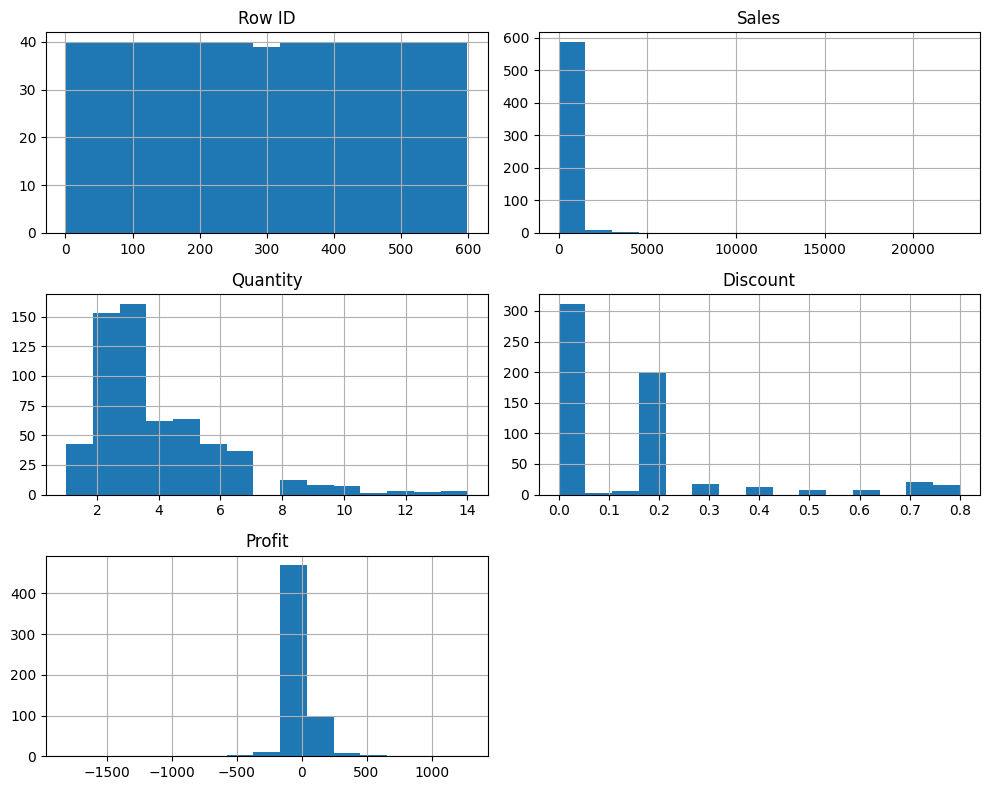

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols].hist(figsize=(10, 8), bins=15)
plt.tight_layout()
plt.show()

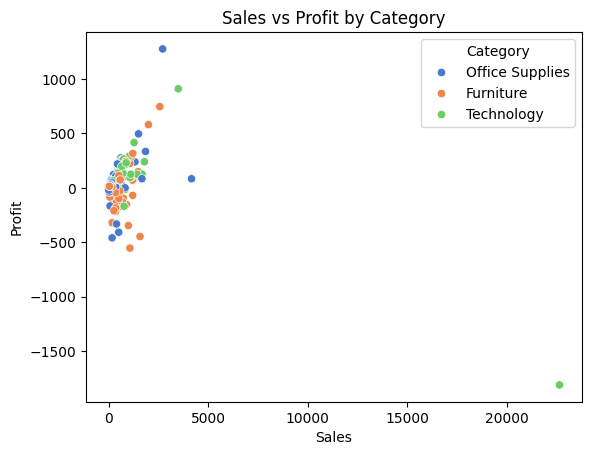

In [ ]:
sns.scatterplot(data=data, x='Sales', y='Profit', hue='Category', palette='muted')
plt.title('Sales vs Profit by Category')
plt.show()

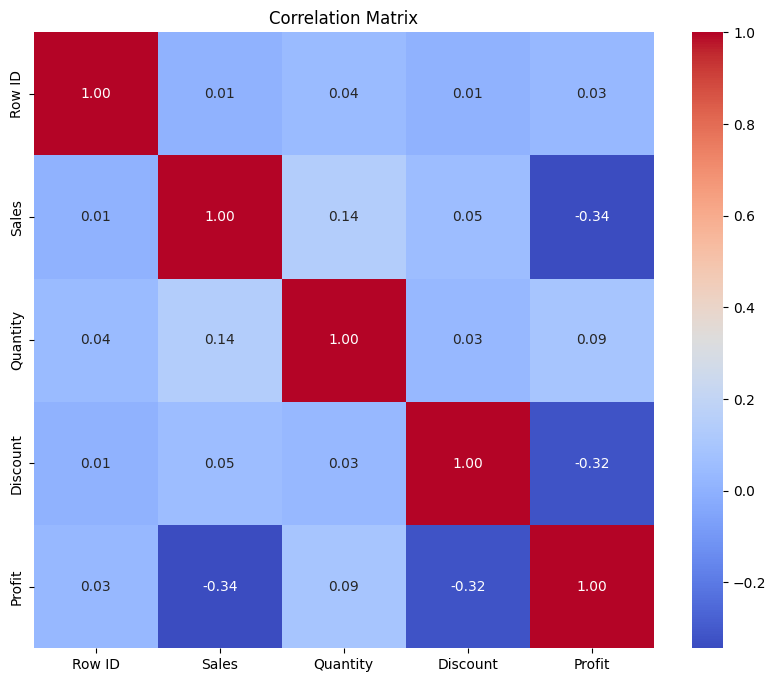

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Create the 'Profitable' column based on the 'Profit' column
data['Profitable'] = (data['Profit'] > 0).astype(int)

# Encoding categorical variables
features = ['Sales', 'Quantity', 'Discount', 'Region', 'Category', 'Ship Mode']
data_encoded = pd.get_dummies(data[features], drop_first=True)

# Define feature matrix (X) and target variable (y)
X = data_encoded
y = data['Profitable']


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier using Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gini)
conf_matrix = confusion_matrix(y_test, y_pred_gini)
class_report = classification_report(y_test, y_pred_gini)

# Display results
print("Decision Tree Classifier (Gini Index):")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Decision Tree Classifier (Gini Index):
Accuracy: 0.91

Confusion Matrix:
[[ 22  11]
 [  5 142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.93      0.97      0.95       147

    accuracy                           0.91       180
   macro avg       0.87      0.82      0.84       180
weighted avg       0.91      0.91      0.91       180



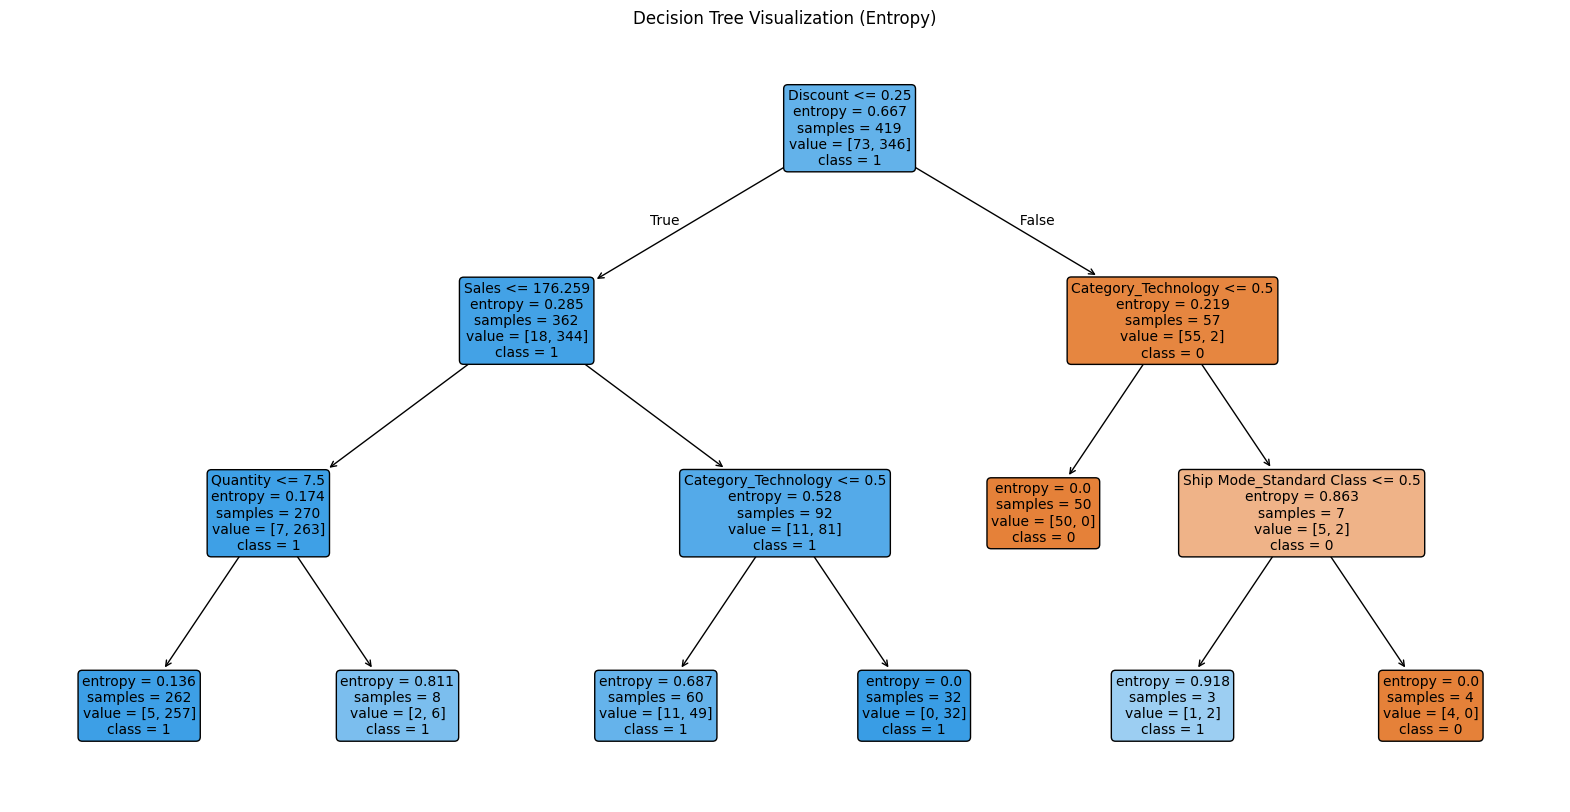

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree trained with Entropy criterion
plt.figure(figsize=(20, 10))
plot_tree(
    clf_entropy,
    feature_names=X.columns,  # Replace with the actual feature names in your dataset
    class_names=[str(cls) for cls in clf_entropy.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Entropy)")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming `y_test` are actual labels and `y_pred_entropy` are predicted labels
print("Precision and Recall:")
print(classification_report(y_test, y_pred_entropy))


Precision and Recall:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        33
           1       0.93      1.00      0.96       147

    accuracy                           0.94       180
   macro avg       0.97      0.83      0.88       180
weighted avg       0.94      0.94      0.93       180



In [ ]:
from sklearn.metrics import f1_score

# F1 Score for the entire dataset (macro/weighted averages)
f1_macro = f1_score(y_test, y_pred_entropy, average='macro')  # Equal weight for each class
f1_weighted = f1_score(y_test, y_pred_entropy, average='weighted')  # Weighted by support

print(f"F1 Score (Macro): {f1_macro}")
print(f"F1 Score (Weighted): {f1_weighted}")


F1 Score (Macro): 0.8819672131147541
F1 Score (Weighted): 0.933879781420765


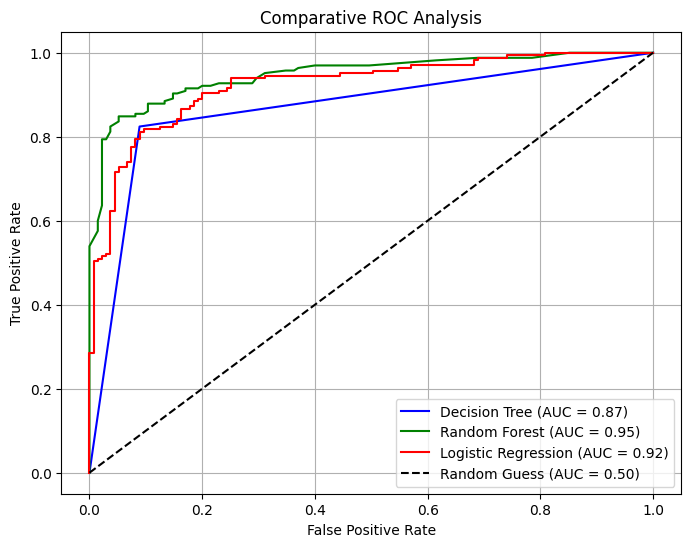

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# 2. Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the models
clf_tree = DecisionTreeClassifier(random_state=42)
clf_rf = RandomForestClassifier(random_state=42)
clf_lr = LogisticRegression(random_state=42)

# 4. Train the models
clf_tree.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)

# 5. Get predicted probabilities for each model
y_score_tree = clf_tree.predict_proba(X_test)[:, 1]
y_score_rf = clf_rf.predict_proba(X_test)[:, 1]
y_score_lr = clf_lr.predict_proba(X_test)[:, 1]

# 6. Calculate ROC and AUC for each model
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# 7. Plot the ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='red')

# Add a random guess line for reference (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Labeling the graph
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Analysis')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


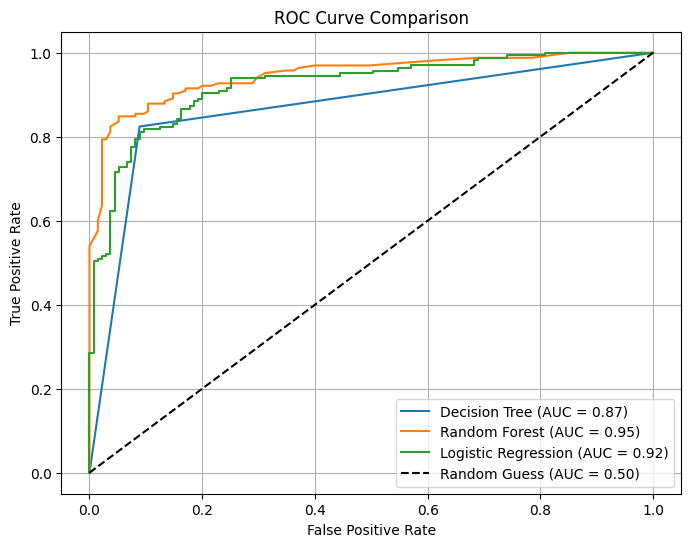

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Generate synthetic data and split
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize and train models
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

# 3. Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# 4. Random guess line and plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

# 5. Show plot
plt.show()


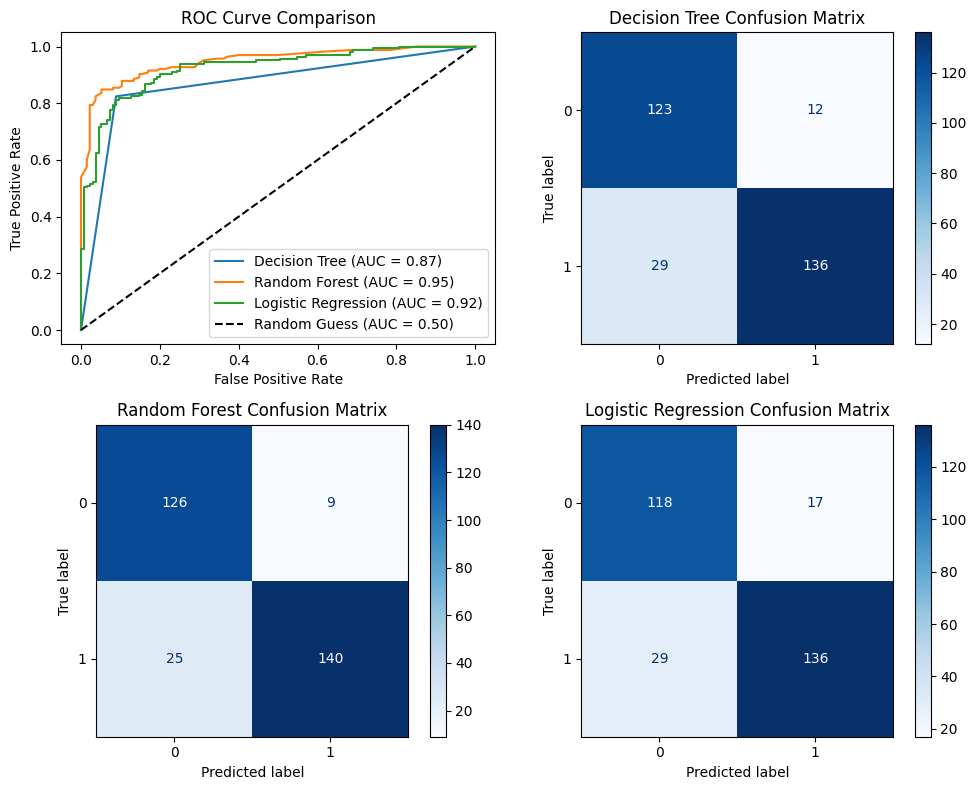

Decision Tree Accuracy: 0.86
Confusion Matrix:
[[123  12]
 [ 29 136]]

Random Forest Accuracy: 0.89
Confusion Matrix:
[[126   9]
 [ 25 140]]

Logistic Regression Accuracy: 0.85
Confusion Matrix:
[[118  17]
 [ 29 136]]



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generate synthetic data and split
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Define models
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

# 3. Train models and plot ROC and confusion matrix
plt.figure(figsize=(10, 8))

for i, (name, model) in enumerate(models, 1):
    model.fit(X_train, y_train)

    # ROC curve
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    ax = plt.subplot(2, 2, i + 1)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')

# Add a random guess line
plt.subplot(2, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

# Show plots
plt.tight_layout()
plt.show()

# 4. Print results
for name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()  # Calculate accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")
